Similarity Finder

In [55]:
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id and client_secret - your private keys from Spotify development tools

In [56]:
client_id = 'YOUR_CLIENT_ID'
client_secret = 'YOUR_CLIENT_SECRET'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

functions for the user being entered to get a set of data for him/her

In [57]:
# function of getting 50 songs from a user's playlist by username and playlist_id
def get_user_playlist(username, playlist_id):
    offset=0
    playlist_songs = sp.user_playlist_tracks(username, playlist_id, limit=50, fields=None, offset=offset, market=None)['items']
    return playlist_songs


# function of creating dataframe for new user based on her/his songs
def create_dataframe(playlist_songs):
    
    playlist_df = pd.DataFrame()
    
    
    playlist_df['id'] = np.array([song['track']['id'] for song in playlist_songs])
    playlist_df['user_id'] = np.array([song['added_by']['id'] for song in playlist_songs])


    audio_analysis = sp.audio_features(playlist_df['id'])    
    
    playlist_df['danceability'] = np.array([audio_info['danceability'] for audio_info in audio_analysis])
    playlist_df['energy'] = np.array([audio_info['energy'] for audio_info in audio_analysis])
    playlist_df['key'] = np.array([audio_info['key'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['mode'] = np.array([audio_info['mode'] for audio_info in audio_analysis])
    playlist_df['speechiness'] = np.array([audio_info['speechiness'] for audio_info in audio_analysis])
    playlist_df['acousticness'] = np.array([audio_info['acousticness'] for audio_info in audio_analysis])
    playlist_df['instrumentalness'] = np.array([audio_info['instrumentalness'] for audio_info in audio_analysis])
    playlist_df['liveness'] = np.array([audio_info['liveness'] for audio_info in audio_analysis])
    playlist_df['valence'] = np.array([audio_info['valence'] for audio_info in audio_analysis])
    playlist_df['tempo'] = np.array([audio_info['tempo'] for audio_info in audio_analysis])
    playlist_df['duration_ms'] = np.array([song['track']['duration_ms'] for song in playlist_songs])
    playlist_df['time_signature'] = np.array([audio_info['time_signature'] for audio_info in audio_analysis])

    playlist_df


    return playlist_df

Reading a users data frame from which a similar person will be selected for a new user

This is a dataset with of 250 anonymous Spotify users, each with around 100 songs.
The total number of rows in this dataset is 28469.
Each song's features such as :
   - user_id
   - artistname
   - trackname
   - playlistname
   - analysis_url
   - uri
   - id
   - song_id
   song parameters: 
        - danceability
        - energy
        - key
        - loudness
        - mode
        - speechiness
        - acousticness
        - instrumentalness
        - liveness
        - valence
        - tempo
        - type
        - duration_ms
        - time_signature
    

   
all data are extracted from Spotify API.

url for source of dataframe : https://www.kaggle.com/datasets/abhinav1331/spotify-dataset?resource=download

In [67]:
df_songs = pd.read_csv('spotify_data.csv', na_values={'?'})
df_songs.head()

,user_id,artistname,trackname,playlistname,song_id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,analysis_url,uri,id
0,c1a6910ecac9fd5e5348326675fb6ca6,Jon Hopkins,Abandon Window,CHILL,5BKp7nLEzAtazOxYla2sBr,0.063,0.1730,6.0,-26.199,1.0,...,0.836000,0.0863,0.1120,68.963,audio_features,297493.0,3.0,https://api.spotify.com/v1/audio-analysis/5BKp...,spotify:track:5BKp7nLEzAtazOxYla2sBr,5BKp7nLEzAtazOxYla2sBr
1,c1a6910ecac9fd5e5348326675fb6ca6,Grouper,Clearing,CHILL,3IL43TRkEnh4buGOZ1Brb5,0.230,0.0432,6.0,-23.066,1.0,...,0.932000,0.1050,0.1360,89.582,audio_features,281680.0,4.0,https://api.spotify.com/v1/audio-analysis/3IL4...,spotify:track:3IL43TRkEnh4buGOZ1Brb5,3IL43TRkEnh4buGOZ1Brb5
2,c1a6910ecac9fd5e5348326675fb6ca6,Com Truise,Closed,CHILL,1z2iz13gYpqnH4IwUQsSLx,0.623,0.5200,2.0,-7.926,1.0,...,0.839000,0.0899,0.1720,172.051,audio_features,184000.0,4.0,https://api.spotify.com/v1/audio-analysis/1z2i...,spotify:track:1z2iz13gYpqnH4IwUQsSLx,1z2iz13gYpqnH4IwUQsSLx
3,c1a6910ecac9fd5e5348326675fb6ca6,Radiohead,Codex,CHILL,6ttYF5VadzTssGV2i1Q08T,0.346,0.1280,2.0,-17.536,0.0,...,0.760000,0.1300,0.0654,58.996,audio_features,287067.0,4.0,https://api.spotify.com/v1/audio-analysis/6ttY...,spotify:track:6ttYF5VadzTssGV2i1Q08T,6ttYF5VadzTssGV2i1Q08T
4,c1a6910ecac9fd5e5348326675fb6ca6,Nina Simone,Cotton Eyed Joe,CHILL,3d5Mw0esNjnh123xyy48IF,0.421,0.0820,0.0,-18.893,1.0,...,0.000209,0.1280,0.2040,72.529,audio_features,171280.0,4.0,https://api.spotify.com/v1/audio-analysis/3d5M...,spotify:track:3d5Mw0esNjnh123xyy48IF,3d5Mw0esNjnh123xyy48IF


DATA PROCESSING

1. drop 'playlistname','artistname','trackname','song_id','analysis_url', 'uri', 'id', 'type' from table because they not useful for grouping
2. instead of several rows for one user, we make one with average data

there are no gaps in the data, so data recovery is not necessary

In [59]:
df_songs = df_songs.drop(['playlistname','artistname','trackname','song_id','analysis_url', 'uri', 'id', 'type'], axis=1)

df_songs = df_songs.groupby('user_id').mean()
df_songs = df_songs.reset_index()
display(df_songs)

,user_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,014cbb4fca17d60636275b13377cab6d,0.603746,0.689825,5.201754,-6.547991,0.719298,0.078396,0.213188,0.032011,0.264378,0.590012,129.756526,251008.868421,3.850877
1,031d69a7c94fdedb5e8648916af3a4e4,0.526715,0.677443,5.145455,-7.790645,0.609091,0.084526,0.220109,0.187888,0.174823,0.441113,125.305018,255422.636364,3.854545
2,04939b224ac61ca0f49f40a7d4ecb090,0.335658,0.329038,5.053571,-14.271250,0.776786,0.046463,0.666997,0.448576,0.149141,0.256812,115.614821,232317.544643,3.669643
3,06f09645c2038a033aa762659191c31d,0.628310,0.834177,6.398230,-5.628876,0.566372,0.120670,0.171279,0.009750,0.377968,0.752403,134.531566,206314.539823,3.991150
4,08b7fc6c0ab7f93f2d9c7e8420ac3a78,0.610019,0.611268,5.556604,-9.068340,0.632075,0.121091,0.203686,0.082953,0.206799,0.466436,116.755991,250786.405660,3.915094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,fc948340135d01bad9c383426af232ab,0.576538,0.783849,4.495798,-5.059798,0.680672,0.062509,0.101068,0.028659,0.217468,0.530187,124.719353,228083.218487,3.991597
246,fd16fd12aab79c33ffd1944d6b2b9af8,0.663913,0.683243,5.617391,-7.413183,0.539130,0.130811,0.140670,0.139733,0.188665,0.549634,118.009583,235083.469565,4.000000
247,fdfe4b21749916357d3a9738db4e5879,0.526561,0.507832,4.885965,-9.327395,0.789474,0.049423,0.436389,0.020724,0.175139,0.460821,115.374702,209211.254386,3.842105
248,fe4717676a185fe1a446d7be3cbc0138,0.511805,0.480423,5.336207,-10.923595,0.517241,0.055281,0.484767,0.245866,0.163057,0.362013,119.945853,249922.732759,3.896552


visualizing the data

In [60]:
import seaborn as sns

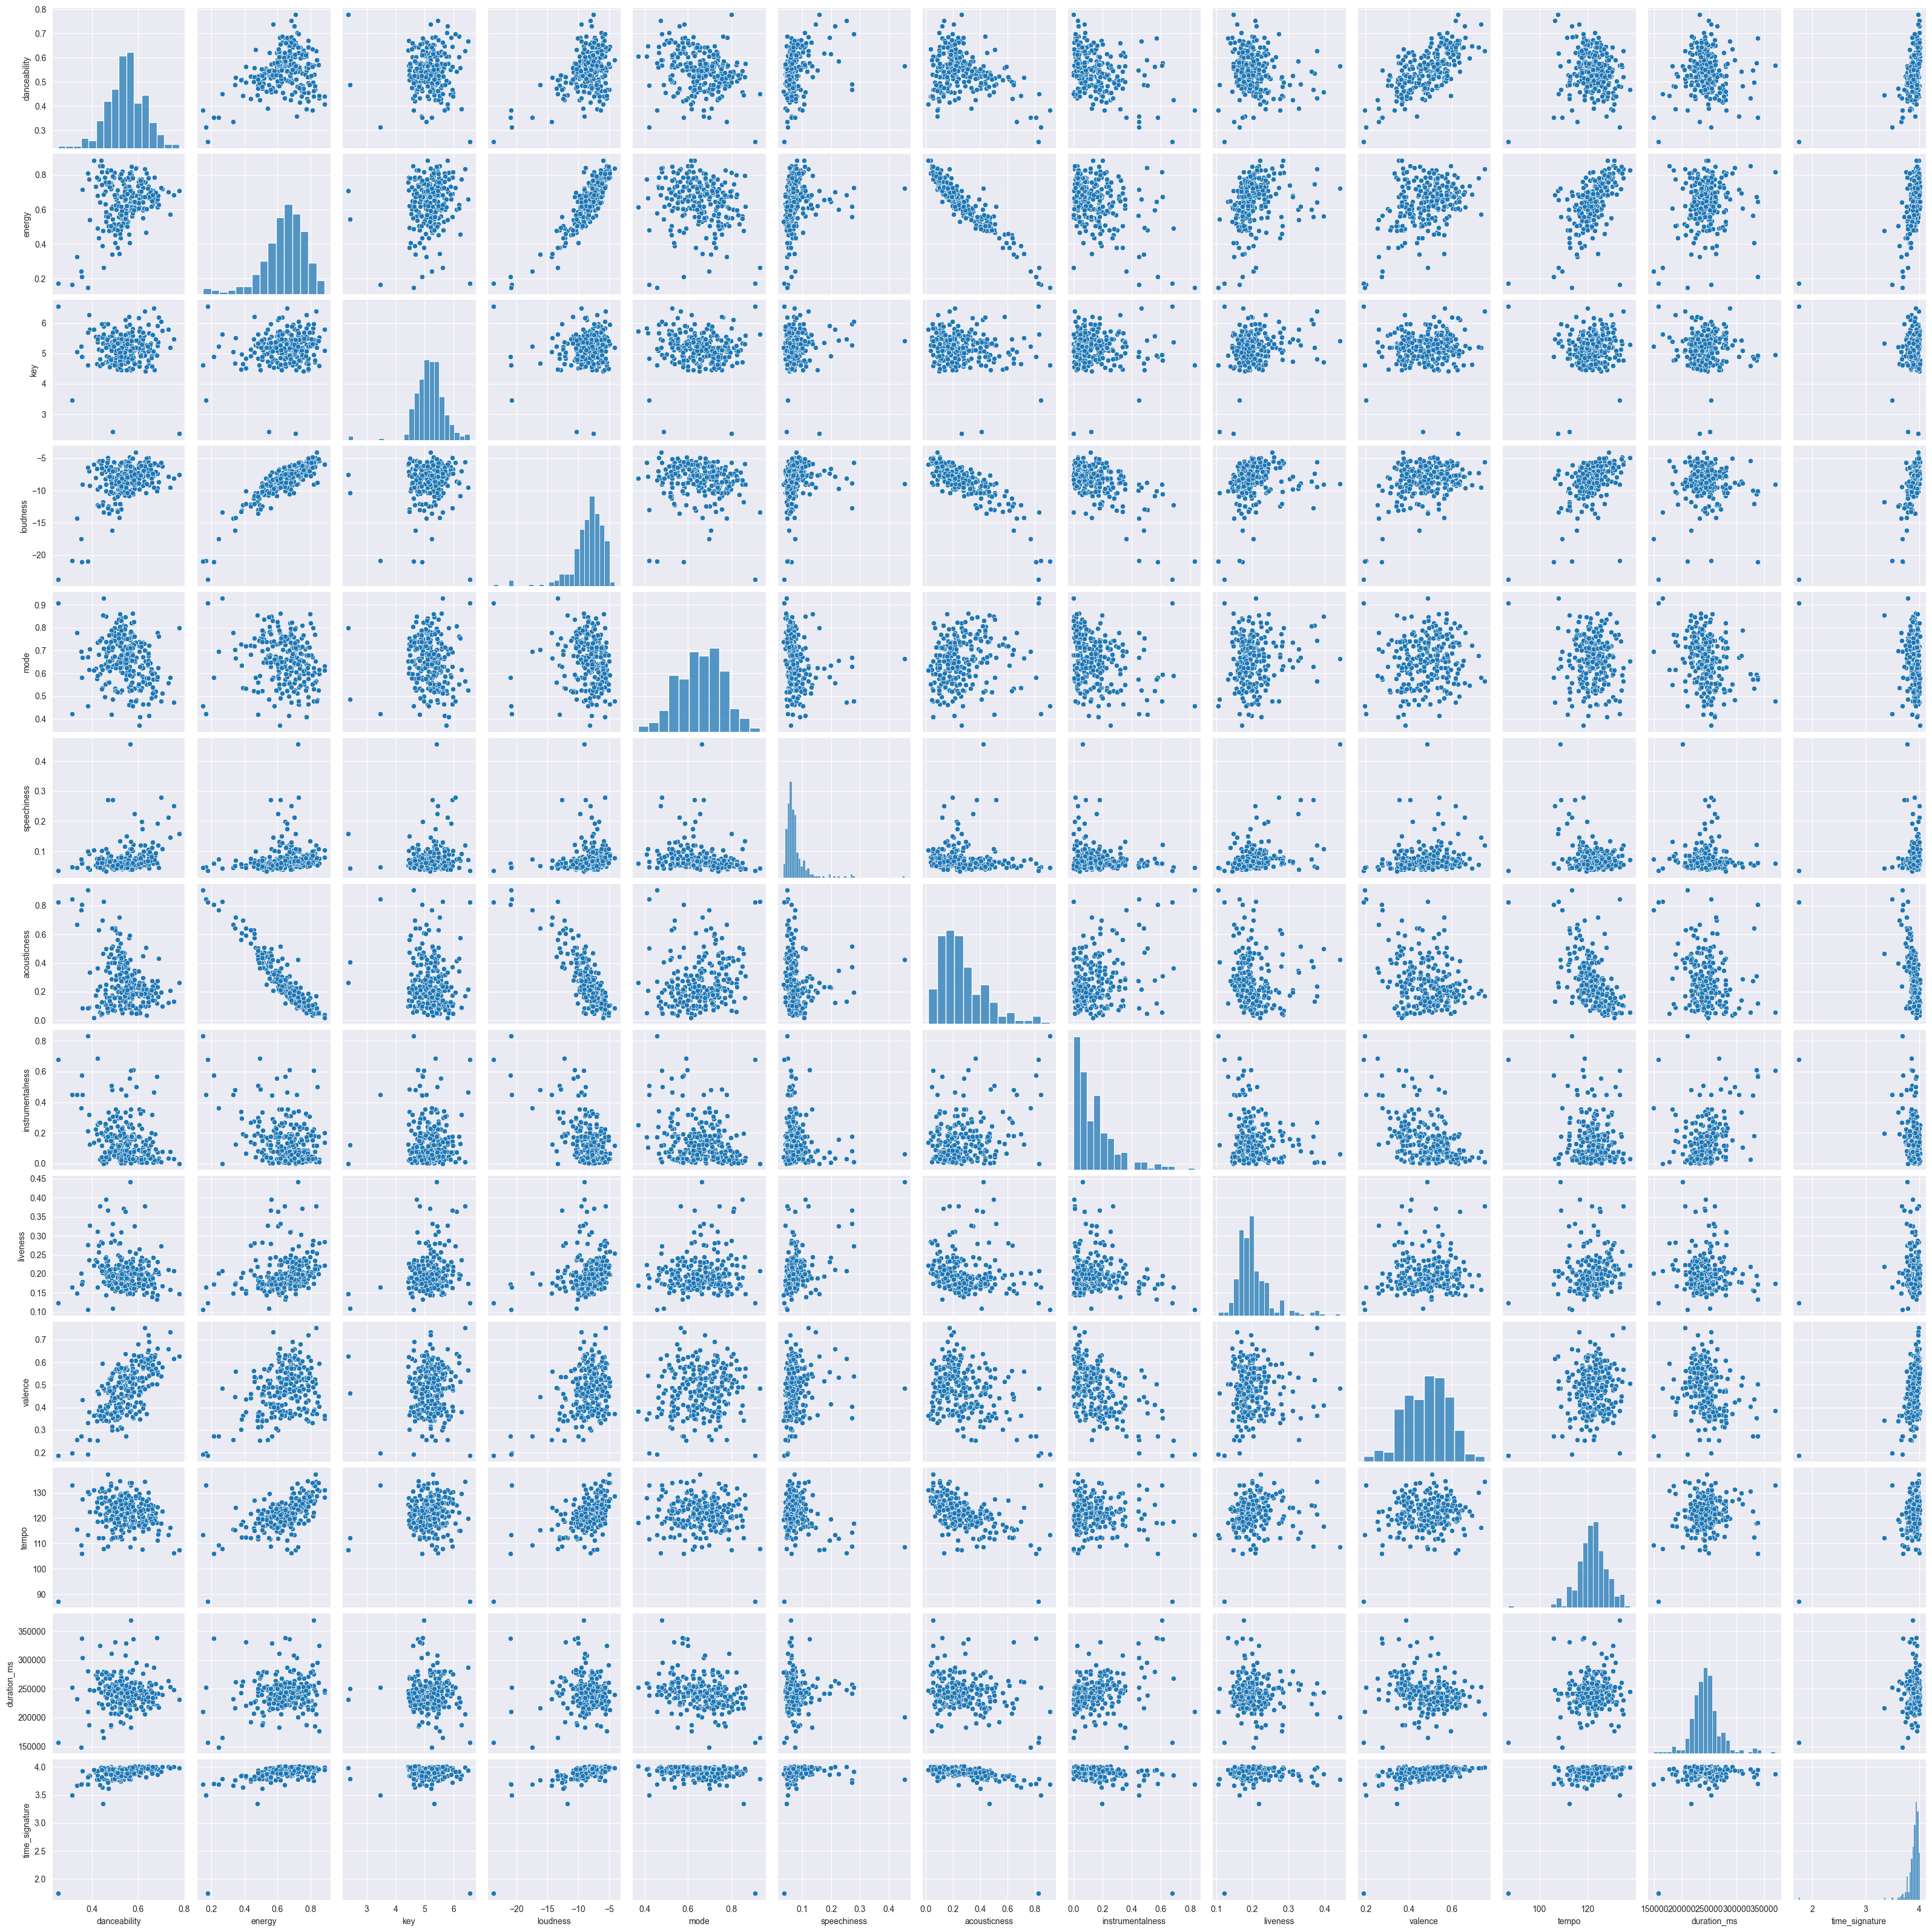

In [61]:
## doing a pairplot to see if there's a noticiable difference in their music
music_pairplot = sns.pairplot(df_songs)
music_pairplot

STANDARDISING DATA
make our algorithm not be biased towards specific parameter

In [62]:
from sklearn.preprocessing import StandardScaler
df_non_standardised = df_songs.drop(['user_id'], axis=1)
scaler = StandardScaler()
scaler.fit(df_non_standardised)

StandardScaler()

KNN
prepare a knn model to find a neighbor for the input user

In [63]:
scaled_features = scaler.transform(df_non_standardised)
df_standardised = pd.DataFrame(scaled_features, columns=df_songs.columns[1:])
df_standardised['user_id'] = df_songs['user_id']
df_standardised.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,user_id
0,0.710347,0.368150,0.031450,0.703291,0.611459,0.046615,-0.308428,-0.827940,1.282391,1.077561,1.323625,0.253540,-0.295775,014cbb4fca17d60636275b13377cab6d
1,-0.249843,0.272441,-0.082149,0.241240,-0.453236,0.183393,-0.267810,0.263389,-0.580583,-0.392407,0.585187,0.410194,-0.273082,031d69a7c94fdedb5e8648916af3a4e4
2,-2.631396,-2.420639,-0.267546,-2.168414,1.166836,-0.665941,2.354938,2.088523,-1.114825,-2.211868,-1.022270,-0.409858,-1.416942,04939b224ac61ca0f49f40a7d4ecb090
3,1.016542,1.483956,2.445637,1.045042,-0.865940,0.989877,-0.554387,-0.983794,3.645347,2.680713,2.115732,-1.332765,0.571996,06f09645c2038a033aa762659191c31d
4,0.788544,-0.239072,0.747447,-0.233839,-0.231186,0.999264,-0.364190,-0.471285,0.084604,-0.142412,-0.832967,0.245644,0.101491,08b7fc6c0ab7f93f2d9c7e8420ac3a78


In [64]:
from sklearn.neighbors import KNeighborsClassifier

X = df_standardised.drop(['user_id'], axis=1)
y = df_standardised['user_id']

knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

enter the data of the user for whom the search will be performed

In [65]:
# user data 
new_user_id = '31emr3wnzqcufqgxgdpwvyqqxh4u'
new_user_playlist_id = 'spotify:playlist:27PEGgCeCoEkVxRQUoOkIM'

# getting user's dataframe
m_playlist = get_user_playlist(new_user_id, new_user_playlist_id)  
user = create_dataframe(m_playlist)
user =  user.drop(columns=['id'], axis=1)
user = user.groupby('user_id').mean()
user = user.reset_index()
user1 = user.loc[user['user_id'] == '31emr3wnzqcufqgxgdpwvyqqxh4u', user.columns != 'user_id']

# search for a person with a similar taste for an input user
pred_knn = knn.predict(user1)

result : id of a user with a similar taste

In [66]:
pred_knn[0]

'0a5aa3ffc5d786440039cf315c655735'